In [72]:
import pandas as pd
import numpy as np

In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D, GlobalMaxPooling1D , Input
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [74]:
dh = pd.read_excel('./DH임베딩파일(찐막).xlsx', index_col=0)
lg = pd.read_excel('./LG임베딩파일(찐막).xlsx', index_col=0)

In [75]:
dh

,predict_date,oil_embedding,dh_embedding,대한타겟
0,2022-01-03,"[-0.6037547588348389, -0.2716784179210663, -0....","[-1.1741582155227661, -0.0009895184775814414, ...",0
1,2022-01-04,"[-0.5196923017501831, -0.10586358606815338, -0...","[-1.5450119972229004, 0.1073550432920456, 0.62...",0
2,2022-01-05,"[0.06001903489232063, -0.26933538913726807, -0...","[0.8755739331245422, -1.1648186445236206, 0.42...",0
3,2022-01-06,"[-0.6277961730957031, 0.20985981822013855, -0....","[-1.0764273405075073, 0.5690973997116089, -1.2...",0
4,2022-01-07,"[-1.1685419082641602, 0.013276146724820137, -0...","[-0.9454445242881775, 0.6343138217926025, -0.3...",1
...,...,...,...,...
478,2023-05-26,"[-0.45255357027053833, -0.4723578691482544, -0...","[-0.7881482243537903, -0.03484155982732773, -0...",0
479,2023-05-28,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.3275092840194702, 0.9411500096321106, -2.1...",1
480,2023-05-29,"[-1.0465337038040161, -0.20726439356803894, -0...","[-1.6175580024719238, -0.22508400678634644, -0...",1
481,2023-05-30,"[-1.3429021835327148, 0.09569352120161057, 0.1...","[-0.3128281235694885, -0.5751327872276306, -0....",1


In [76]:
oil_embedding = []
dh_embedding = []
for i in dh['oil_embedding']:
    oil_embedding.append(eval(i))
    # print(eval(i))
for i in dh['dh_embedding']:
    dh_embedding.append(eval(i))
dh['oil_embedding_1']= oil_embedding
dh['dh_embedding_2']= dh_embedding

In [77]:
df_result = pd.DataFrame()
for i in range(len(dh)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)

    df_result= pd.concat([df_result, pd.DataFrame(list(dh['oil_embedding_1'])[i]).T], ignore_index = True)

In [78]:
type(list(df_result.iloc[0,:]))

list

In [79]:
df_result

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.603755,-0.271678,-0.812940,-0.732505,1.679937,-0.320991,0.525592,-0.279307,0.255106,0.215050,...,1.457479,0.809190,0.704428,0.146627,-0.854588,-1.671246,-0.436029,-0.057224,1.855249,1.139105
1,-0.519692,-0.105864,-0.399729,-0.153286,1.698339,0.407529,0.409696,1.019430,-1.025467,0.544463,...,0.407320,0.826747,1.114994,0.073963,-2.249787,-0.447777,-0.076592,0.005267,1.683512,0.757458
2,0.060019,-0.269335,-0.375879,-0.055317,1.237866,0.961472,0.435542,0.551956,-0.950539,0.339819,...,0.998950,1.134493,1.003262,0.288413,-2.100803,-0.600193,0.382251,-0.437854,1.418905,2.027399
3,-0.627796,0.209860,-0.601977,0.212837,1.812124,0.338195,0.436366,0.986948,-1.099345,0.497106,...,0.439375,1.022380,0.934944,-0.079708,-1.501415,-0.652590,-0.026899,-0.373844,1.491888,1.266829
4,-1.168542,0.013276,-0.546796,0.537248,1.024967,-0.028498,0.690467,0.386332,-0.914949,0.406805,...,0.892284,1.755600,0.381127,-0.117529,-1.447188,-1.316976,-0.099403,0.634946,1.323219,1.146488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,-0.452554,-0.472358,-0.218625,0.454478,1.475429,0.433745,0.329881,-0.043510,-0.453107,0.020897,...,0.906278,1.510035,1.389731,0.328730,-1.723043,-1.052029,0.378987,-1.323859,1.675607,2.448260
479,-1.046534,-0.207264,-0.606413,-0.067534,0.916513,0.263695,0.644144,0.938791,-0.131497,0.993549,...,0.785773,-0.209585,0.293168,-0.013948,-1.642941,-0.291213,-0.009325,0.488460,0.710202,1.555536
480,-1.046534,-0.207264,-0.606413,-0.067534,0.916513,0.263695,0.644144,0.938791,-0.131497,0.993549,...,0.785773,-0.209585,0.293168,-0.013948,-1.642941,-0.291213,-0.009325,0.488460,0.710202,1.555536
481,-1.342902,0.095694,0.102224,0.344559,0.964635,-0.093258,0.980000,-0.521690,-0.219455,0.449778,...,0.866611,1.295319,0.125314,0.521784,-0.554063,-0.810824,0.398724,0.599131,1.092970,1.299752


In [80]:
df_result_2 = pd.DataFrame()
for i in range(len(dh)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)

    df_result_2= pd.concat([df_result_2, pd.DataFrame(list(dh['dh_embedding_2'])[i]).T], ignore_index = True)

In [81]:
type(list(df_result_2.iloc[0,:]))

list

In [82]:
tensor_3d = []

for i in dh.index :
    tensor_date = []
    tensor_date.append(list(df_result.iloc[i,:]))
    tensor_date.append(list(df_result_2.iloc[i,:]))
    tensor_3d.append(tensor_date)

tensor_3d = np.array(tensor_3d)

In [164]:
print(tensor_3d.shape)

(483, 2, 768)


In [84]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [85]:
X_train, X_test, y_train, y_test = train_test_split(tensor_3d, dh['대한타겟'], test_size = 0.2, random_state = 1, stratify = dh['대한타겟'])

In [137]:
y_train.value_counts()

0    224
1    162
Name: 대한타겟, dtype: int64

In [138]:
y_test.value_counts()

0    56
1    41
Name: 대한타겟, dtype: int64

In [136]:
dh['대한타겟'].value_counts()

0    280
1    203
Name: 대한타겟, dtype: int64

In [86]:
X_train.shape

(386, 2, 768)

In [87]:
X_train[0]

array([[-0.70324355, -0.16047175, -0.35448724, ...,  0.49790552,
         1.11972225,  1.43337274],
       [-0.04675079, -0.35739568, -0.95522374, ..., -1.24019313,
         2.03530502,  1.52473521]])

In [88]:
X_train[1]

array([[-1.17150342, -0.49536985, -0.80054468, ..., -0.3041203 ,
         0.6057775 ,  1.44141078],
       [-0.90078592, -0.0503068 , -0.63492179, ..., -0.08985347,
         1.39828467,  1.36699736]])

In [165]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),dropout=0.25),
    layers.LSTM(100, return_sequences=True,dropout=0.25),
    layers.LSTM(100, return_sequences=True,dropout=0.25),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

In [166]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [167]:
training_record = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_train, y_train),
                    shuffle=True)

Epoch 1/30
4/4 [==============================] - 15s 1s/step - loss: 0.6922 - val_loss: 0.6879
Epoch 2/30
4/4 [==============================] - 0s 72ms/step - loss: 0.6869 - val_loss: 0.6834
Epoch 3/30
4/4 [==============================] - 0s 69ms/step - loss: 0.6838 - val_loss: 0.6809
Epoch 4/30
4/4 [==============================] - 0s 67ms/step - loss: 0.6811 - val_loss: 0.6805
Epoch 5/30
4/4 [==============================] - 0s 70ms/step - loss: 0.6831 - val_loss: 0.6822
Epoch 6/30
4/4 [==============================] - 0s 73ms/step - loss: 0.6832 - val_loss: 0.6811
Epoch 7/30
4/4 [==============================] - 0s 101ms/step - loss: 0.6818 - val_loss: 0.6801
Epoch 8/30
4/4 [==============================] - 0s 69ms/step - loss: 0.6799 - val_loss: 0.6797
Epoch 9/30
4/4 [==============================] - 0s 70ms/step - loss: 0.6799 - val_loss: 0.6797
Epoch 10/30
4/4 [==============================] - 0s 70ms/step - loss: 0.6820 - val_loss: 0.6822
Epoch 11/30
4/4 [============

In [168]:
pred_proba = model.predict(X_test)

4/4 [==============================] - 2s 9ms/step


In [169]:
X_test

array([[[-0.63309938,  0.22473773, -0.03897778, ...,  0.02382608,
          1.60407984,  1.38182867],
        [-0.87592322, -0.17949136, -0.19219509, ..., -0.22420385,
          0.44713318,  2.0297904 ]],

       [[-0.94795483,  0.17356171, -0.11822058, ..., -0.50408614,
          1.19680679,  1.32580733],
        [-1.12071967, -0.68729067, -0.17126402, ..., -0.10445392,
          0.53052628,  0.9271484 ]],

       [[-0.88704598, -0.28591505, -0.69571424, ..., -1.17174947,
          1.71846771,  2.5039978 ],
        [-1.73966396,  0.87273365,  0.19086622, ..., -0.65934026,
          1.61146677,  1.49353909]],

       ...,

       [[-0.4294197 , -0.1392417 , -0.19139127, ..., -0.41766158,
          1.58596015,  1.11923683],
        [-1.11081338, -0.19177169, -0.14876902, ..., -0.07995575,
         -0.0337111 ,  1.19135904]],

       [[-0.30972695, -0.29102081, -0.22192083, ...,  0.56691581,
          1.71717095,  1.02047658],
        [-1.57666171,  0.19011131, -0.35502031, ..., -0.06835

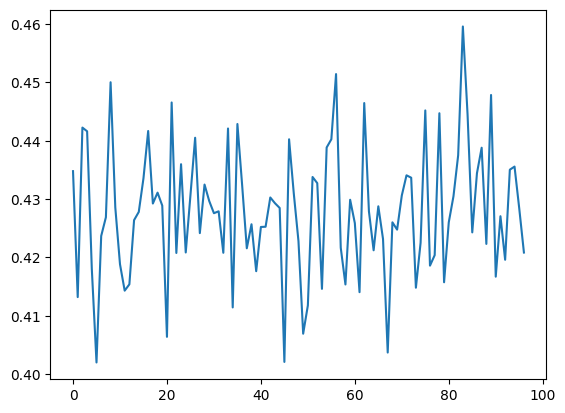

In [170]:
plt.plot(pred_proba)

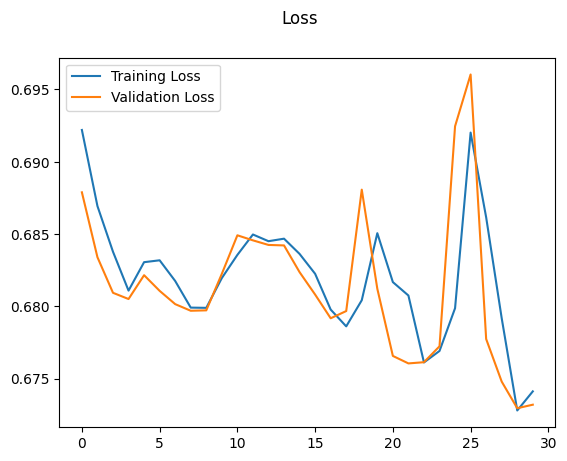

In [171]:
fig, ax = plt.subplots()
plt.plot(training_record.history["loss"], label="Training Loss")
plt.plot(training_record.history["val_loss"], label="Validation Loss")
plt.legend()
fig.suptitle("Loss")
plt.show()

In [185]:
# 2차원인 pred_proba를 1차원으로 변경해준다 (1000,1)=>(1000)
pred_proba_1d = pred_proba.reshape(-1)

# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.43
pred = (pred_proba_1d >= threshold)

In [186]:
# Compute the metrics
accuracy_test_rnn= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test_rnn}')
#=> Accuracy: 0.988

precision_test_rnn=precision_score(y_test, pred)
print(f'Precision = {round(precision_test_rnn,3)}')
#=> Precision = 0.99

recall_test_rnn=recall_score(y_test, pred)
print(f'Recall = {round(recall_test_rnn,3)}')
#=> Recall = 0.99

f1_test_rnn=f1_score(y_test, pred)
print(f'f1 score = {round(f1_test_rnn,3)}')

Accuracy: 0.5567010309278351
Precision = 0.474
Recall = 0.439
f1 score = 0.456


In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, f1_score

# Keras 모델 함수 정의
def create_model():
    model = tf.keras.Sequential([
    layers.LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dropout(0.25),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    return model

# 모델 생성을 위한 함수형 모델 래퍼 생성
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=128)

# 데이터 전처리 파이프라인 정의
pipeline = Pipeline([
    ('model', model)
])

# 모델 성능 지표를 평가할 함수 정의
def evaluate_model(X, y):
    acc_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X, y, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

    f1_scorer = make_scorer(f1_score)
    f1_scores = cross_val_score(pipeline, X, y, cv=5, scoring=f1_scorer)

    mean_acc_score = acc_scores.mean()
    mean_precision_score = precision_scores.mean()
    mean_recall_score = recall_scores.mean()
    mean_f1_score = f1_scores.mean()

    return [mean_acc_score, mean_precision_score, mean_recall_score, mean_f1_score]

# 모델 평가
score_list = evaluate_model(X_train, y_train)
print("평균 정확도:", score_list[0])
print("평균 정밀도:", score_list[1])
print("평균 재현율:", score_list[2])
print("평균 f1 score:", score_list[3])

<ipython-input-174-46b23a76241d>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=128)


Epoch 1/30
3/3 [==============================] - 7s 29ms/step - loss: 0.6874
Epoch 2/30
3/3 [==============================] - 0s 32ms/step - loss: 0.6788
Epoch 3/30
3/3 [==============================] - 0s 29ms/step - loss: 0.6764
Epoch 4/30
3/3 [==============================] - 0s 30ms/step - loss: 0.6650
Epoch 5/30
3/3 [==============================] - 0s 29ms/step - loss: 0.6633
Epoch 6/30
3/3 [==============================] - 0s 28ms/step - loss: 0.6504
Epoch 7/30
3/3 [==============================] - 0s 38ms/step - loss: 0.6384
Epoch 8/30
3/3 [==============================] - 0s 29ms/step - loss: 0.6320
Epoch 9/30
3/3 [==============================] - 0s 29ms/step - loss: 0.6100
Epoch 10/30
3/3 [==============================] - 0s 33ms/step - loss: 0.5971
Epoch 11/30
3/3 [==============================] - 0s 31ms/step - loss: 0.5639
Epoch 12/30
3/3 [==============================] - 0s 34ms/step - loss: 0.5520
Epoch 13/30
3/3 [==============================] - 0s 34ms/st

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터셋과 타겟 데이터 준비
X = X_train
y = dh["대한타겟"]

# LSTM 모델 정의
def create_lstm_model(units, dropout_rate):
    model = tf.keras.Sequential([
    layers.LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dropout(0.25),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

# LSTM 모델 생성 함수를 그리드 서치에 적용
model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32)

# 그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'units': [32, 64, 128],  # LSTM hidden state size에 해당하는 units 값
    'dropout_rate': [0.25, 0.5, 0.75]  # LSTM dropout 비율
}

# 그리드 서치 객체 생성
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# 그리드 서치 수행
grid_result = grid.fit(X, y)

# 결과 출력
print("최적 하이퍼파라미터:", grid_result.best_params_)
print("최고 정확도:", grid_result.best_score_)